# Support Vector Machines (SVM) - Hard Margin Case
---
Recall the binary classification problem that SVMs try to solve. The hard margin SVM finds the seperating decision bounary with the largest margin. 

<img src="MaxMargin.jpg" height="400" width="400">

In this assigment, you will write the code to find the maximum margin for the hard margin case.

We showed in class that we could solve this problem  by reducing it to the problem of solving a quadratic programming problem (QP).  There are many solvers for quadratic programming problems. We will use the *Convex Optimization Library*, [CVXOPT](https://cvxopt.org/userguide/coneprog.html#quadratic-programming); a free software package that works well with Python and numpy. 
You will need to install [CVXOPT](https://cvxopt.org/install/)

In CVXOPT, the quadratic programming problem solver, <b><i>cvxopt.solvers.qp</i></b>,  solves the following problem:

$$\begin{eqnarray} \min_{x}\frac{1}{2} x^{T}Px - q^{T}x \nonumber \\\ \textrm{s.t.}\quad Gx \preceq h \\\ \textrm{and}\quad Ax = b \end{eqnarray}$$

 Note that $ Gx \preceq h $ is taken elementwise. 

The solver's (simplified) API is `cvxopt.solvers.qp(P, q, G, h, A, b)` 
where only $P$ and $q$ are required. 

You will need to match the solver's API.

The solver's argument's type must be CVXOPT matrices.  Please look at this [link](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf) for more information. I suggest you first create the arguments as NumpPy arrays and matrices and then convert them to CVXOPT matrices (For example, first import the library: `from cvxopt import matrix` then convert a NumPy matrix `P` to a CVXOPT matrix using ` P = matrix(P)`)

What is return by the solver  is a Python dictionary.  If you save the return value in a variable called `sol` (i.e. `sol = solvers.qp(...)`), you can access to the solution of the quadratic programming problem by typing `sol["x"]`.

# Hard Margin Case

 We will use synthetic data. The following code will reads the linearly sepearable data and plots the points.


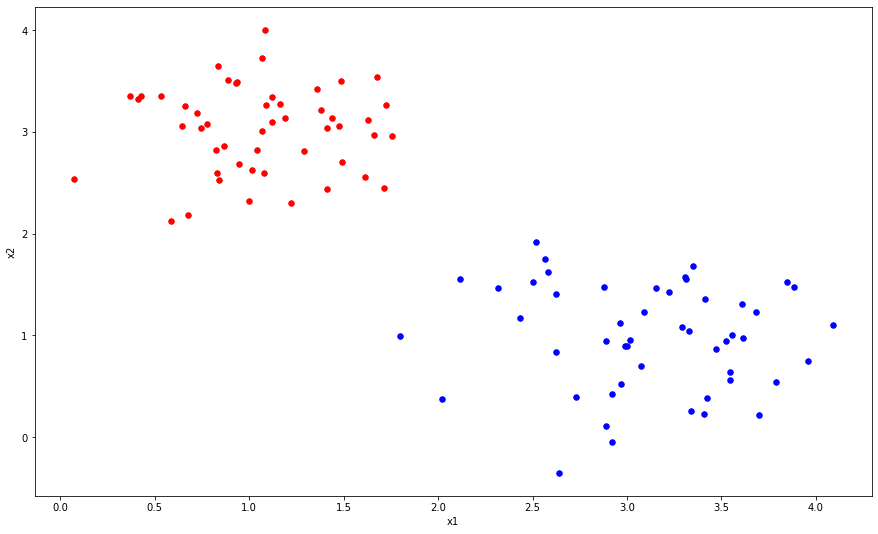

In [1]:
import numpy as np
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline


X = genfromtxt('X.csv', delimiter=',') # reading in the data matrix
y = genfromtxt('y.csv', delimiter=',') # reading in the labels
idx_1 = np.where(y == 1)
idx_0 = np.where(y == -1)

plt.figure(figsize=(15,9))
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='r', marker="o")
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

## SVM Primal  Problem
---
### Problem 1.1

You will now use the quadratic problem solver to find the maximum margin for the SVM primal problem:

$$\begin{eqnarray}\left.\begin{aligned}  
&\min_{w}\frac{1}{2}||w||^{2} & \nonumber \\\ 
&\textrm{s.t.}  \quad y^{(i)}(w^{T}{\bf x}^{(i)} + w_0) \ge 1 \quad \forall i \end{aligned}\right.\end{eqnarray}$$


Look back at the lecture notes for the primal problem.  Please note that the variable names used in the lecture are different from the variable names given to decribe the API for CVXOPT's quadratic problem solver.




 Write the function `linear_svm(X, y)` that:
- takes in as arguments the data matrix $X$ and the labels $\bf y$ 
- solves the SVM primal QP problem 
- returns  ${\bf w}$ and $w_0$

In [2]:
def calc_P(X):
    d = X.shape[1]
    P = np.identity(d+1)
    P[0,0] = 0
    return P

print(calc_P(X))

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
"""
a = np.array([2,3])
b = np.hstack((1, a))
print(b)
"""
def calc_G(X, y):
    d = X.shape[1]
    G = np.empty((0,d+1))
    for i in range(X.shape[0]):
        one_row = np.hstack((y[i], y[i] * X[i]))
        G = np.vstack((G, one_row))
    # take negative to change the direction of inequality 
    return -G

# print(calc_G(X,y))

In [4]:
def get_h(X):
    return -np.ones((X.shape[0], 1))

# print(get_h(X))

def get_q(X):
    return np.zeros((X.shape[1]+1, 1))

# print(get_q(X))

## test part


In [5]:
import numpy 
from cvxopt import matrix 
from cvxopt import solvers
# Define QP parameters (directly) 
"""
P = matrix([[1.0,0.0],[0.0,0.0]]) 
q = matrix([3.0,4.0]) 
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]]) 
h = matrix([0.0,0.0,-15.0,100.0,80.0])
sol = solvers.qp(P,q,G,h)
print(sol['x'])
"""


"\nP = matrix([[1.0,0.0],[0.0,0.0]]) \nq = matrix([3.0,4.0]) \nG = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]]) \nh = matrix([0.0,0.0,-15.0,100.0,80.0])\nsol = solvers.qp(P,q,G,h)\nprint(sol['x'])\n"

In [6]:
def linear_svm(X,y):
    solvers.options['show_progress'] = False
    
    P = matrix(calc_P(X), tc='d')
    G = matrix(calc_G(X, y), tc='d')
    h = matrix(get_h(X), tc='d')
    q = matrix(get_q(X), tc='d')
    
    sol = solvers.qp(P,q,G,h)
    return sol['x']

In [7]:
# fit svm classifier
weights = linear_svm(X, y)
w0 = weights[0]
w = weights[1:3]
print(w0)
print(w)

0.46118098859684725
[ 1.42e+00]
[-1.59e+00]



### Plotting the classification decision boundary

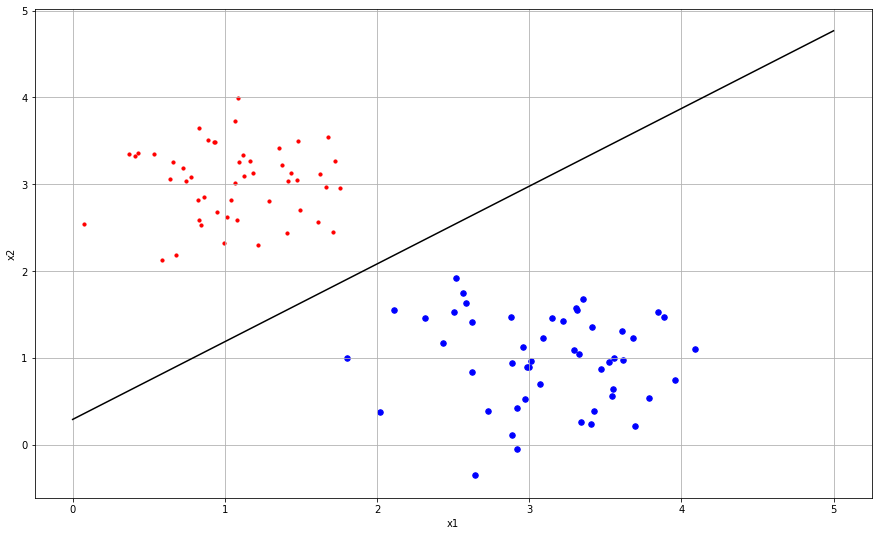

In [8]:
def plot_data_with_classification_boundary(X, y, w, w0, fig_size=(15, 9), labels=['x1', 'x2']):
    COLORS = ['blue', 'red']
    unique = np.unique(y)
    


    idx_1 = np.where(y == 1)
    idx_0 = np.where(y == -1)

    plt.figure(figsize=(15,9))
    plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
    plt.scatter(X[idx_0,0], X[idx_0,1], s=10, c='r', marker="o")
    plt.xlabel('x1')
    plt.ylabel('x2')
        
    ## Write code here ##
            
    slope = -w[0] / w[1]
    intercept = -w0 / w[1]
    x = np.arange(0, 6)
    plt.plot(x, x * slope + intercept, 'k-')
    
    plt.grid()

# plotting the points and decision boundary   
plot_data_with_classification_boundary(X, y, w, w0)

### Problem 1.2 
Determine which points are closest to the decision boundary. What is the functional margin of the points closest to the decision boundary?   

In [9]:
temp = np.array(w)
print(temp.shape)


(2, 1)


In [10]:
w = np.array(w)
# Your code goes here
min_distance = float('inf')
support_vector = [0,0]
for i in range(X.shape[0]):
    gamma = y[i] * (w.T.dot(X[i]) + w0)
    if gamma < min_distance:
        min_distance = gamma
        support_vector = X[i]
        
print(f"Functional margin is {min_distance}")
print(f"The point closest to decision boundry is {support_vector}")

Functional margin is [1.]
The point closest to decision boundry is [1.71138733 2.45204836]


### Problem 1.3

Write the decision function $f_{\texttt{primal}}({\bf x})$ to predict examples.  Use this function to predict the label of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$

In [11]:
def f_primal(x, w, w0):
    if x.T.dot(w) + w0 > 0:
        return 1
    else: 
        return -1 

# write the code to predict (3.0, 1.5)^T and (1.2, 3.0)^T here
label = f_primal(np.array([[3.0],[1.5]]), w, w0)
print(f"Label for point [3.0, 1.5]^T is {label}")
label = f_primal(np.array([[1.2],[3.0]]), w, w0)
print(f"Label for point [1.2, 3.0]^T is {label}")

Label for point [3.0, 1.5]^T is 1
Label for point [1.2, 3.0]^T is -1


## SVM Dual Problem

---

To keep things simple, we will use a linear kernel $K({\bf x}^{(i)}, {\bf x}^{(j)})={\bf x}^{(i)T}{\bf x}^{(j)}$.  In the statement of the problem below, I replaced ${\bf x}^{(i)}$ with $\phi({\bf x}^{(i)})$ as was done in the lecture notes.

### Problem 2.1
The SVM dual problem was derived in class by:
- defining the lagrangian of the Primary problem: $L = \frac{1}{2}||w||^{2} - \sum_{i} \alpha^{(i)} [y^{(i)}(w^{T}\phi({\bf x}^{(i)}) + w_0)-1]$
- equating it's partial derivatives with respect to $w$ and $w_0$ to zero, and 
- substituting $w$ back into the lagrangian.

It resulted in a quadratic programming problem (QP) of the following form:

$$\begin{eqnarray}\left.\begin{aligned}  
&\min_{\alpha}\frac{1}{2} \alpha^{T}Q\alpha - 1^{T}\alpha \nonumber \\\ &\textrm{s.t.}\quad \alpha_{i} \ge 0 \quad \forall i \\\ 
&\:\:\:\:\:\quad y^{T}\alpha = 0 \end{aligned}\right.\end{eqnarray}$$




 Write the function `kernel_svm(x, y)`that:
- takes in as arguments: the data matrix $X$, the labels $y$ 
- solves the SVM dual QP problem using a linear kernel
- returns:  ${\bf \alpha}$

In [12]:
# see website https://xavierbourretsicotte.github.io/SVM_implementation.html
"""
y_matrix = y.reshape(100,1)
print(y_matrix.shape)
temp = np.hstack((y_matrix,y_matrix))
# print(temp)
X_prime = X * temp
# print(X_prime)
P = X_prime.dot(X_prime.T)
print(P)
"""
def calc_kernel_P(X,y):
    y_temp = y.reshape(100,1)
    y_matrix = np.hstack((y_temp, y_temp))
    X_prime = X * y_matrix
    return X_prime.dot(X_prime.T)

In [13]:
def calc_kernel_q(X):
    return -np.ones((X.shape[0],1))

In [14]:
def calc_kernel_G(X):
    d = X.shape[0]
    return -np.eye(d)

In [15]:
def calc_kernel_h(X):
    d = X.shape[0]
    return np.zeros((d,1))
    # return np.zeros(d)

In [16]:
def calc_kernel_A(y):
    return y.reshape(1,100)

In [17]:
def kernel_svm(X, y): 
    P = matrix(calc_kernel_P(X,y), tc='d')
    q = matrix(calc_kernel_q(X), tc='d')
    G = matrix(calc_kernel_G(X), tc='d')
    h = matrix(calc_kernel_h(X), tc='d')
    A = matrix(calc_kernel_A(y), tc='d')
    b = matrix(np.zeros(1), tc='d')
    
    sol = solvers.qp(P,q,G,h,A,b)
    alpha = np.array(sol['x'])
    alpha[alpha < 0.001] = 0.0
    return alpha

# fit svm dual classifier
alpha = kernel_svm(X, y)
# print(alpha)

Treat any $\alpha^{(i)} \le 1/1000$ as $0$.

### problem 2.2 

Write a function `compute_w (X, y, alpha)` that: 
- takes in as arguments the data matrix $X$, labels ${\bf y}$, and ${\bf \alpha}$ 
- returns ${\bf w}$ and $w_0$ 

Compare this ${\bf w}$ and $w_0$ computed by the dual with the ${\bf w}$ and $w_0$ computed by the primal

In [18]:
def calc_w(X,y,alpha):
    temp = y.reshape(100,1) * alpha
    temp_matrix = np.hstack((temp, temp))
    return np.sum((temp_matrix * X), axis=0)
    # return temp_matrix * X

In [19]:
def calc_w0(X,y,w):
    S = (alpha > 0).flatten()
    y = y.reshape(100,1)
    return (y[S] - np.dot(X[S], w))[0][0]

In [20]:
def compute_classification_boundary (X, y, alpha):
    w = calc_w(X,y,alpha)
    w0 = calc_w0(X,y,w)
    
    return w, w0


w, w0 = compute_classification_boundary(X, y, alpha)
print(f"w is {w}")
print(f"w0 is {w0}")

w is [ 1.42189318 -1.58830104]
w0 is 0.4611809737387924


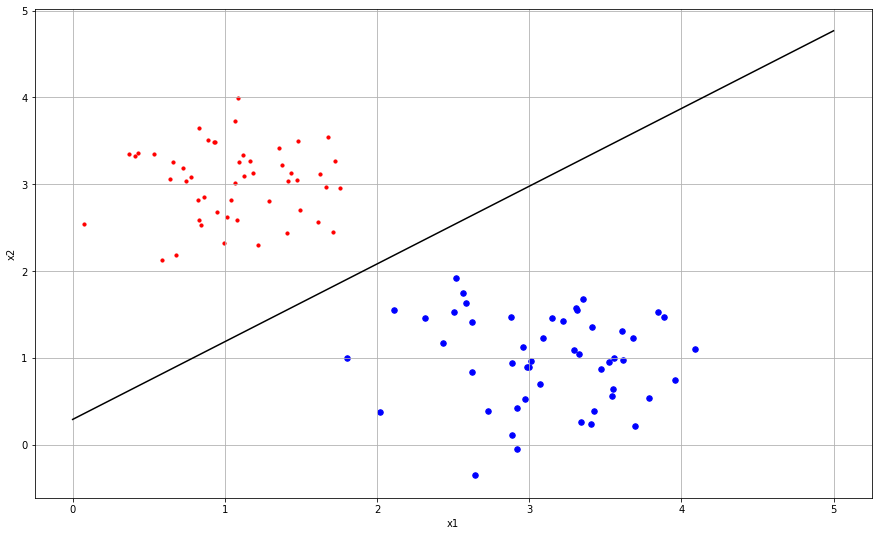

In [21]:
plot_data_with_classification_boundary(X, y, w, w0)

### Problem 2.3 

Write the code to determine which of the training examples are support vectors.  Write the code to determine the functional margin of the support vectors.

In [23]:
# Write the code here
w = np.array(w)
# Your code goes here
min_distance = float('inf')
support_vector = [0,0]
a_i = 0
for i in range(X.shape[0]):
    gamma = y[i] * (w.T.dot(X[i]) + w0)
    if gamma < min_distance:
        min_distance = gamma
        support_vector = X[i]
        a_i = alpha[i]
        
print(f"Functional margin is {min_distance}")
print(f"The point closest to decision boundry is {support_vector}")
print(f"The corresspond a_i is {a_i}")

Functional margin is 0.9999999978691956
The point closest to decision boundry is [1.71138733 2.45204836]
The corresspond a_i is [2.2722402]


### Problem 2.4

Write the decision function $f_{\texttt{dual}}({\bf x})=
\left(\sum_{i\in I}
\alpha^{(i)}y^{(i)}
K({\bf x}^{(i)},{\bf x})
\right)+w_0$ 
where $I = \{i\mid \alpha^{(i)}\not = 0\}$.  The kernel function will be the linear kernel.  Use the decision function to predict the class of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$


In [27]:
def K(xi, xj):
    return np.dot(xi,xj)

def f_dual(X, y, x, alpha, w0):
    f_x = 0
    for i in range(X.shape[0]):
        f_x = f_x + alpha[i] * y[i] * K(X[i], x)
    f_x = f_x + w0
    if f_x > 0:
        return 1
    else:
        return -1


In [28]:
# write the code to predict (3.0, 1.5)^T and (1.2, 3.0)^T here
label = f_dual(X, y, np.array([[3.0],[1.5]]), alpha, w0)
print(f"Label for point [3.0, 1.5]^T is {label}")
label = f_dual(X, y, np.array([[1.2],[3.0]]), alpha, w0)
print(f"Label for point [1.2, 3.0]^T is {label}")

Label for point [3.0, 1.5]^T is 1
Label for point [1.2, 3.0]^T is -1
